In [3]:
# 문 titanic 데이터 셋을 불러와서
# 1. 나이가 10세 미만인 승객의 class, 성별, 나이, 생존여부를 출력
# 2. 클래스가 1등급인 승객의 나이, fare, 클래스, 생존 여부를 출력
# 3. 성별이 남성이고 20대에서 40대 미만인 승객의 모든 정보 출력

import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

print(df.head())

df_age = df.loc[df.age < 10, ['class', 'age', 'sex', 'alive']]
print(df_age)

df_class = df.loc[df['class'] == 'First', ['age', 'fare', 'class', 'alive']]
print(df_class)

df_man = df[(df['sex'] == 'male') & (df['age'] >= 20) & (df['age'] < 40)]
df_man

#sns.countplot(data=df, x="Embarked", hue="Survived")

#low_fare = train[train[""] < 500]

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
      class   age     sex alive
7     Third  2.00    male    no
10    Third  4.00  female   yes
16    Third  2.00    male    no
24    Third  8.00  female    no
43   Second  3.00  female   yes
..      ...   ...     ...  

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True
12,0,3,male,20.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True
13,0,3,male,39.0,1,5,31.275,S,Third,man,True,NaN,Southampton,no,False
20,0,2,male,35.0,0,0,26.000,S,Second,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.500,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.050,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [8]:
# deck이 203건 밖에 안되기 때문에 분석 컬럼에서 임시로 제외
# 원본을 보존하고, 임시 데이터 자료를 생성하기 위해서 copy함수로 복사
df_t = df.copy()
df_t.drop(columns ='deck', axis=1, inplace=True)
df_t.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
embark_town    889
alive          891
alone          891
dtype: int64

In [13]:
df_t.head()
# 가장 많은 나이
print(df_t.age.max()); print()

# 클래스별 승객 인원수
print(df_t['class'].value_counts()); print()

# 남자와 여자의 승객수
print(df_t.sex.value_counts())

80.0

Third     491
First     216
Second    184
Name: class, dtype: int64

male      577
female    314
Name: sex, dtype: int64


In [24]:
# 전체의 평균나이보다 적은 나이의 승객 정보를 출력
# age, class, sex 정보만 출력

# 방법 1
df_age = df_t.loc[df_t.age < df_t['age'].mean(), ['age', 'class', 'sex']]
print(df_age)

      age   class     sex
0    22.0   Third    male
2    26.0   Third  female
7     2.0   Third    male
8    27.0   Third  female
9    14.0  Second  female
..    ...     ...     ...
883  28.0  Second    male
884  25.0   Third    male
886  27.0  Second    male
887  19.0   First  female
889  26.0   First    male

[384 rows x 3 columns]


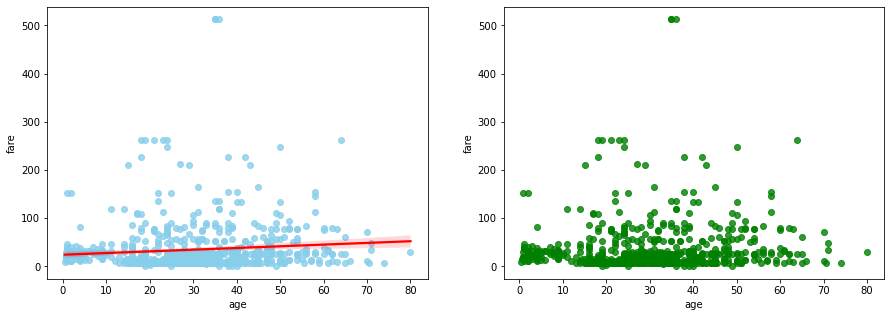

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

# age, fare 컬럼간의 관계 -> 회귀선
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1) # 회귀선을 그리기
ax2 = fig.add_subplot(1, 2, 2) # 회귀선 보이지 않기

# 그래프 그리기 - 선형회귀선 표시(fig_reg = True)
sns.regplot(x= 'age', y='fare', data=titanic, ax=ax1, color='skyblue', line_kws={'color': 'red'})
# 그래프 그리기 - 선형회귀선 표시 없음 (fig_reg = False)
sns.regplot(x= 'age', y='fare', data=titanic, ax=ax2, fit_reg=False, color='green')

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


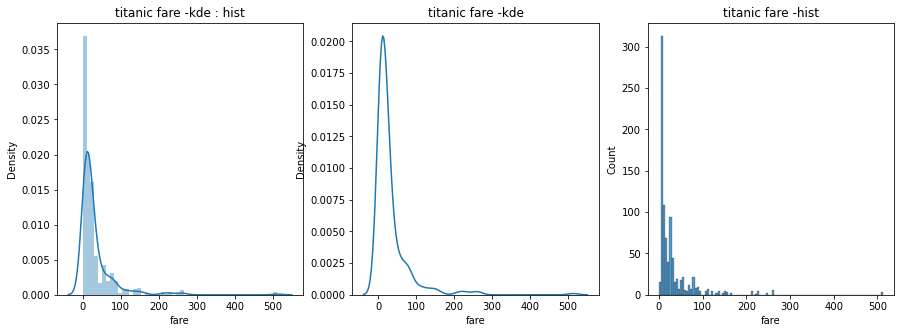

In [12]:
# 커널 밀도 함수 : data가 집중된 분포, hist, kde
fig = plt.figure(figsize=(15,5)) # (10, 10)
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 기본 값 : hist = True, kde = True
sns.distplot(titanic['fare'], ax=ax1)

# kde = True, hist = Fasle
sns.kdeplot(titanic['fare'], ax=ax2)

# kde = False, hist = True
sns.histplot(titanic['fare'], ax=ax3)


ax1.set_title('titanic fare -kde : hist')
ax2.set_title('titanic fare -kde')
ax3.set_title('titanic fare -hist')
plt.show()

<AxesSubplot:xlabel='class', ylabel='sex'>

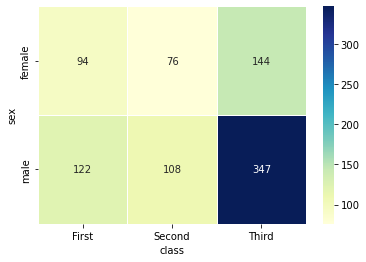

In [13]:
# heatmap : 색깔로 두 변수의 관계성을 보여주는 그래프
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
sns.heatmap(table, annot=True, fmt='d', # format = decimal
           cmap='YlGnBu',
           linewidth=.5,
           cbar = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Swarm Plot')

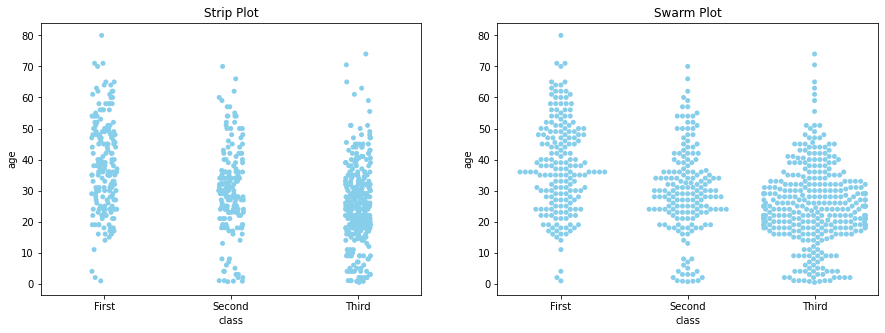

In [14]:
# df.plot(x, y) # x의 개수와 y의 개수는 동일
# 범주형 데이터의 산점도 (타이타닉의 1,2,3등석의 산점도)
titanic['class'].dtype

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 이산형 변수의 분포 : 데이터 분산 고려하지 않음
sns.stripplot(x= 'class', y='age', data=titanic, ax=ax1, color='skyblue')

# 이산형 변수의 분포 : 데이터 분산 고려
sns.swarmplot(x= 'class', y='age', data=titanic, ax=ax2, color='skyblue')

ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')